In [28]:
import tensorflow as tf
import numpy as np

In [29]:
# 8.1 텐서플로 허브에서 사전 훈련된 MobileNet 모델 불러오기
import tensorflow_hub as hub

mobile_net_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"
model = tf.keras.Sequential([
    hub.KerasLayer(handle=mobile_net_url, input_shape=(224, 224, 3), trainable=False)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              3540265   
                                                                 
Total params: 3,540,265
Trainable params: 0
Non-trainable params: 3,540,265
_________________________________________________________________


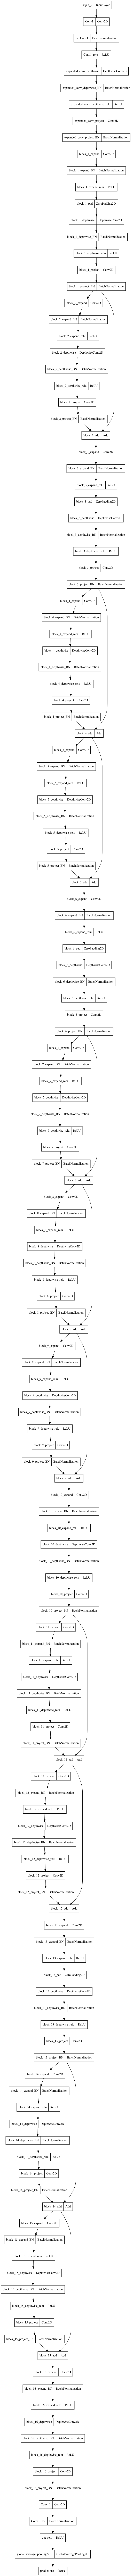

In [30]:
# 그림 8.2 좌측 전체 네트워크 구조 출력 코드
from tensorflow.keras.applications import MobileNetV2

mobilev2 = MobileNetV2()
tf.keras.utils.plot_model(mobilev2)

In [31]:
path = "/Users/moogie/Desktop/myPyCode"
tf.keras.utils.get_file("imagenetV2", 'https://s3-us-west-2.amazonaws.com/imagenetv2public/imagenetv2-top-images.tar.gz',
                       extract=True, cache_subdir="data", cache_dir=path)

'/Users/moogie/Desktop/myPyCode/data/imagenetV2'

In [32]:
data_root = pathlib.Path(glob("/Users/moogie/Desktop/myPyCode/data/*/")[0])

In [33]:
# 8.3 디렉토리 출력
for idx, item in enumerate(data_root.iterdir()):
    print(item)
    if idx == 9:
        break

/Users/moogie/Desktop/myPyCode/data/imagenetv2-top-images-format-val/797
/Users/moogie/Desktop/myPyCode/data/imagenetv2-top-images-format-val/909
/Users/moogie/Desktop/myPyCode/data/imagenetv2-top-images-format-val/135
/Users/moogie/Desktop/myPyCode/data/imagenetv2-top-images-format-val/307
/Users/moogie/Desktop/myPyCode/data/imagenetv2-top-images-format-val/763
/Users/moogie/Desktop/myPyCode/data/imagenetv2-top-images-format-val/551
/Users/moogie/Desktop/myPyCode/data/imagenetv2-top-images-format-val/61
/Users/moogie/Desktop/myPyCode/data/imagenetv2-top-images-format-val/95
/Users/moogie/Desktop/myPyCode/data/imagenetv2-top-images-format-val/338
/Users/moogie/Desktop/myPyCode/data/imagenetv2-top-images-format-val/936


In [39]:
# 8.4 ImageNet 라벨 텍스트 불러오기
label_file = tf.keras.utils.get_file('label', 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
label_text = None
with open(label_file, 'r') as f:
    label_text = f.read().split('\n')[:-1]
print(len(label_text))
print(label_text[:10])
print(label_text[-10:])

# 폴더 이름이 wordnet의 단어로 수정되었기 때문에, nltk 패키지에서 wordnet을 다운받습니다.
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet

# wordnet과 인터넷에 올라온 label 텍스트는 조금씩 다르기 때문에 차이를 없애기 위해서 아래의 전처리 작업을 진행합니다.
label_text = [c.lower().replace('-','').replace('_','').replace(' ','') for c in label_text]     

1001
['background', 'tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen']
['buckeye', 'coral fungus', 'agaric', 'gyromitra', 'stinkhorn', 'earthstar', 'hen-of-the-woods', 'bolete', 'ear', 'toilet tissue']


[nltk_data] Downloading package wordnet to /Users/moogie/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
# 이미지를 랜덤하게 섞습니다.
random.shuffle(all_image_paths)

In [42]:
image_count = len(all_image_paths)
print("image_count :", image_count)

image_count : 10000


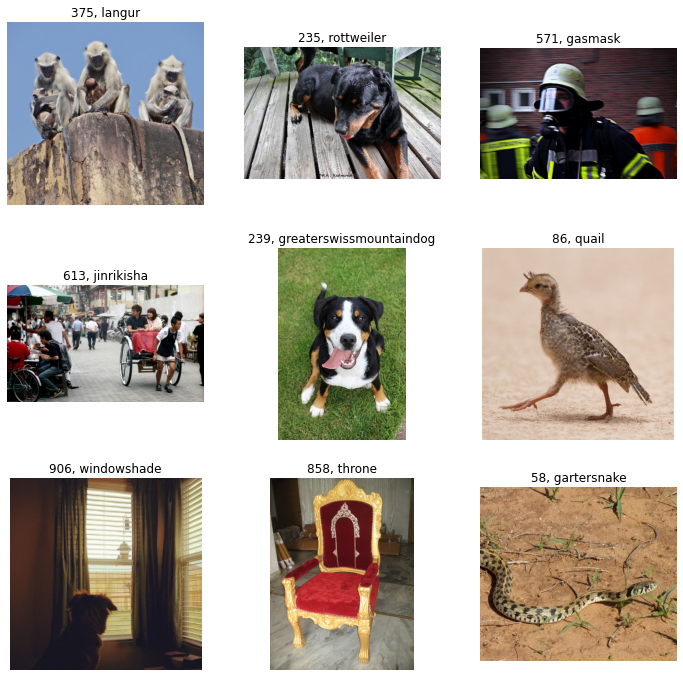

In [45]:
plt.figure(figsize=(12,12))
for c in range(9) :
    image_path = random.choice(all_image_paths)
    plt.subplot(3,3,c+1)
    plt.imshow(plt.imread(image_path))
    idx = int(image_path.split('/')[-2]) + 1
    plt.title(str(idx) + ', ' + label_text[idx])
    plt.axis('off')
plt.show()

In [59]:
# 8.6 MobileNet의 분류 성능 확인
# 한번 실행하는데 15분 이상소요..
import cv2

top_1 = 0
top_5 = 0

for image_path in all_image_paths :
    img = cv2.imread(image_path)
    img = cv2.resize(img, dsize=(224, 224))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    top_5_predict = model.predict(img)[0].argsort()[::-1][:5]
    idx = int(image_path.split('/')[-2])+1
    if idx in top_5_predict:
        top_5 += 1
        if top_5_predict[0] == idx:
            top_1 += 1

print('Top-5 correctness:', top_5 / len(all_image_paths) * 100, '%')
print('Top-1 correctness:', top_1 / len(all_image_paths) * 100, '%')

1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 69ms/step
Top-5 correctness: 83.52000000000001 %
Top-1 correctness: 59.06 %


1/1 [==============================] - 0s 65ms/step


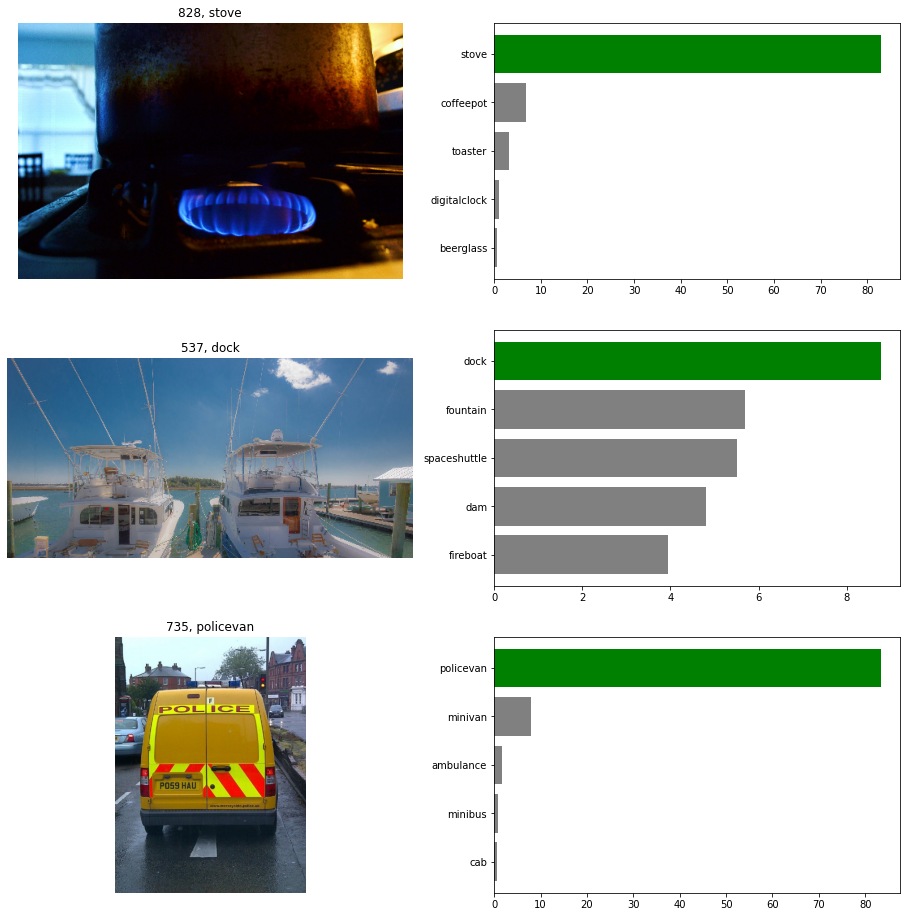

In [64]:
plt.figure(figsize=(16,16))

def softmax(x) :
    e_x = np.exp(x-np.max(x))
    return e_x / e_x.sum(axis=0)

for c in range(3) :
    image_path = random.choice(all_image_paths)
    
    # 이미지 표시
    plt.subplot(3,2, c*2+1)
    plt.imshow(plt.imread(image_path))
    idx = int(image_path.split('/')[-2]) + 1
    plt.title(str(idx) + ', ' + label_text[idx])
    plt.axis('off')
    
    # 예측값 표시
    plt.subplot(3,2,c*2+2)
    img = cv2.imread(image_path)
    img = cv2.resize(img, dsize=(224,224))
    img = img/255.0
    img = np.expand_dims(img, axis=0)
    
    # MobileNet을 이용한 예측
    logits = model.predict(img)[0]
    prediction = softmax(logits)
    
    # 가장높은 확률의 예측값 5개를 봅음
    top_5_predict = prediction.argsort()[::-1][:5]
    labels = [label_text[index] for index in top_5_predict]
    color = ['gray'] * 5
    if idx in top_5_predict:
        color[top_5_predict.tolist().index(idx)] = 'green'
    color = color[::-1]
    plt.barh(range(5), prediction[top_5_predict][::-1] * 100, color=color)
    plt.yticks(range(5), labels[::-1])    